In [3]:
import charset_normalizer

with open('sample/집수리 성공기 첨부내용.csv', 'rb') as file:
    result = charset_normalizer.detect(file.read())
    print(result)

{'encoding': 'CP949', 'language': 'Korean', 'confidence': 1.0}


In [24]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('sample/집수리 성공기 첨부내용.csv', encoding='CP949')

# 데이터 구조 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   사례 일련번호  66 non-null     int64 
 1   순번       66 non-null     int64 
 2   내용(비고)   66 non-null     object
 3   시공전 사진   66 non-null     object
 4   시공후 사진   66 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.7+ KB
None


In [5]:
print(df.isnull().sum())

사례 일련번호    0
순번         0
내용(비고)     0
시공전 사진     0
시공후 사진     0
dtype: int64


In [6]:
# 결측치가 있는 행 제거
df_cleaned = df.dropna()

# 결과 확인
print("\n결측치 제거 후:")
print(df_cleaned.isnull().sum())
print(f"원래 행 수: {len(df)}, 제거 후 행 수: {len(df_cleaned)}")


결측치 제거 후:
사례 일련번호    0
순번         0
내용(비고)     0
시공전 사진     0
시공후 사진     0
dtype: int64
원래 행 수: 66, 제거 후 행 수: 66


In [8]:
df_cleaned.to_csv('sample/집수리 성공기 첨부내용_처리완료.csv', encoding='utf-8', index=False)

In [10]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

수리 유형 분포:
 수리유형
기타     24
주방      7
화장실     6
지붕      4
반지하     3
신발장     3
배관      2
안방      2
스위치     2
단열      2
수전      2
거실      2
문       2
외벽      1
현관      1
창호      1
곰팡이     1
타일      1
Name: count, dtype: int64


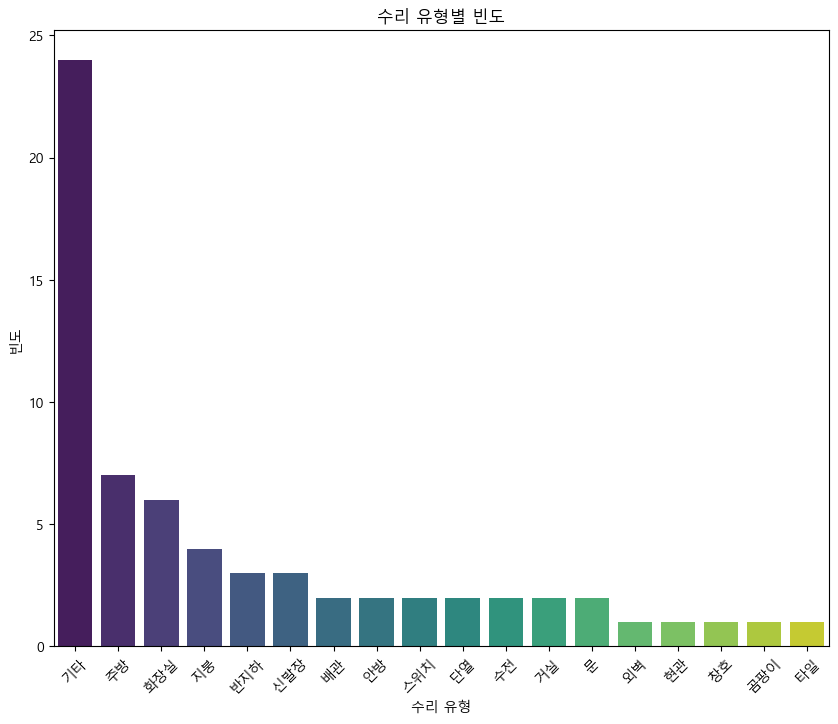

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정

# 데이터 로드
df = pd.read_csv('sample/집수리 성공기 첨부내용_처리완료.csv', encoding='utf-8')

# 수리 유형 추출
keywords = ['주방', '화장실', '지붕', '외벽', '반지하', '단열', '창호', '곰팡이', '스위치', '조명', '수전', '신발장', '거실', '안방', '현관', '배관', '타일', '문']
df['수리유형'] = df['내용(비고)'].apply(lambda x: next((k for k in keywords if k in x.lower()), '기타'))

# 수리 유형별 빈도 출력
print("수리 유형 분포:\n", df['수리유형'].value_counts())

# 1. 막대그래프
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='수리유형', order=df['수리유형'].value_counts().index, palette='viridis')
plt.title('수리 유형별 빈도')
plt.xlabel('수리 유형')
plt.ylabel('빈도')
plt.xticks(rotation=45)
plt.show()


In [35]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('sample/위도경도추출.csv', encoding='utf-8')
df

,업체명,업체주소,위도,경도
0,금강인테리어,서울특별시 관악구 낙성대역길 35 1층,NaN,NaN
1,청목CM건축,서울특별시 종로구 창신길 31 1층,NaN,NaN
2,삼전디앤씨,서울특별시 강남구 학동로101길 21 5층 501호,NaN,NaN
3,주민산업건설(주),서울특별시 동대문구 이문로12길 60 101호,NaN,NaN
4,연 건축사사무소,서울특별시 은평구 진흥로 120 3층,NaN,NaN
...,...,...,...,...
304,진성건설개발(주),서울특별시 은평구 연서로15길 10 2층(구산동),NaN,NaN
305,공정건축협동조합,서울특별시 은평구 응암로 326-2 (응암동),NaN,NaN
306,은평우리동네맥가이버협동조합,"서울특별시 은평구 통일로 890 3층(불광동, 금왕빌딩)",NaN,NaN
307,한두레협동조합,서울특별시 은평구 통일로87길 6-5 3층 1호,NaN,NaN


In [36]:
# CSV 파일 읽기
df = pd.read_csv('sample/cost3.csv', encoding='utf-8')
df

,코드,단위,단가,적용률,자재_종류,자재_조건
0,LH111.20120,m2,26267,97%,커튼월유리 설치,12mm 이하
1,LH112.20160,m2,28563,97%,커튼월유리 설치,16mm 이하
2,LH113.20180,m2,29875,97%,커튼월유리 설치,18mm 이하
3,LH114.20220,m2,30407,97%,커튼월유리 설치,22mm 이하
4,LH114.20240,m2,31720,97%,커튼월유리 설치,24mm 이하
...,...,...,...,...,...,...
56,OG001.00000,m,4486,96%,조이너 설치,NaN
57,OG002.00000,m,7850,96%,몰딩 설치,NaN
58,OK200.00000,m,15129,97%,마루귀틀,NaN
59,OM100.00000,m2,14975,94%,흡음판 벽,NaN
